In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1)
ERROR: No matching distribution found for torch==1.8.1+cu111


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16793, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 16793 (delta 35), reused 77 (delta 28), pack-reused 16679
Receiving objects: 100% (16793/16793), 15.57 MiB | 14.22 MiB/s, done.
Resolving deltas: 100% (11514/11514), done.


In [ ]:
cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.0 MB/s eta 0:00:00
  Using cached ultralytics-8.2.50-py3-none-any.whl (799 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached ultralytics_thop-2.0.0-py3-none-any.whl (25 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found exist

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import numpy as np
import cv2
from collections import Counter
from torchsummary import summary
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
!cd yolov5 && python train.py --img 360 --batch 64 --epochs 1000 --data dataset.yml --weights yolov5s.pt

Streaming output truncated to the last 5000 lines.
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:04<00:00,  1.40s/it]
                   all        260        260     0.0156      0.827     0.0453     0.0124

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      3/999      6.38G    0.08238    0.01969    0.06381          8        384: 100% 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.06it/s]
                   all        260        260     0.0128      0.873     0.0429     0.0107

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      4/999      6.38G    0.07962     0.0237    0.06451         13        384: 100% 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:03<00:00,  1.01s/it]
               

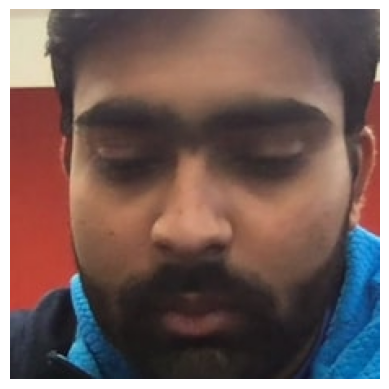

In [ ]:
img = cv2.imread('/content/Test6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-7-6 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
prediction = model('/content/c0450.png')

In [ ]:
prediction.print()

image 1/1: 227x227 1 awake
Speed: 30.9ms pre-process, 906.2ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)


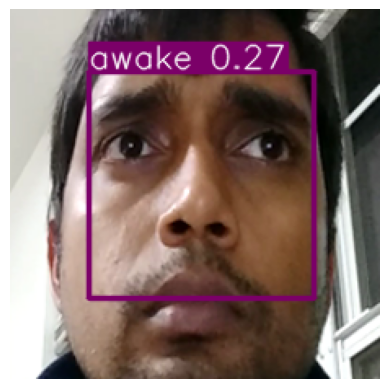

In [ ]:
%matplotlib inline
plt.axis('off')
plt.imshow(np.squeeze(prediction.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()